In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

In [2]:
pred_path = "/Users/mariusgiger/repos/master/sdo-cli/output/aia_171_2017_256_cevae_pred/20210406-122257_cevae/predictions/predictions.txt"
data_path = "/Users/mariusgiger/repos/master/sdo-cli/data/aia_171_2017_full_disk_256/test"

In [3]:
df = pd.read_csv(pred_path, header=None, names = ["img", "score"])
df.head()

,img,score
0,2017-01-01T000000__171.jpeg,0.028283
1,2017-01-01T120000__171.jpeg,0.029640
2,2017-01-02T000000__171.jpeg,0.029250
3,2017-01-02T120000__171.jpeg,0.029526
4,2017-01-03T000000__171.jpeg,0.029191


In [4]:
df = df.sort_values(by=['score'], ascending=False)
df.head(10)

,img,score
504,2017-09-11T120000__171.jpeg,0.039809
222,2017-04-22T120000__171.jpeg,0.038733
502,2017-09-10T120000__171.jpeg,0.038504
114,2017-02-27T000000__171.jpeg,0.038407
503,2017-09-11T000000__171.jpeg,0.038267
221,2017-04-22T000000__171.jpeg,0.037804
225,2017-04-24T000000__171.jpeg,0.037770
113,2017-02-26T120000__171.jpeg,0.037338
223,2017-04-23T000000__171.jpeg,0.037304
224,2017-04-23T120000__171.jpeg,0.037110


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

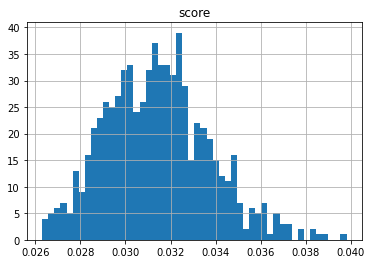

In [5]:
hist = df.hist(bins=50)
hist

In [6]:
df.describe()

,score
count,713.000000
mean,0.031401
std,0.002320
min,0.026303
25%,0.029706
50%,0.031321
75%,0.032777
max,0.039809


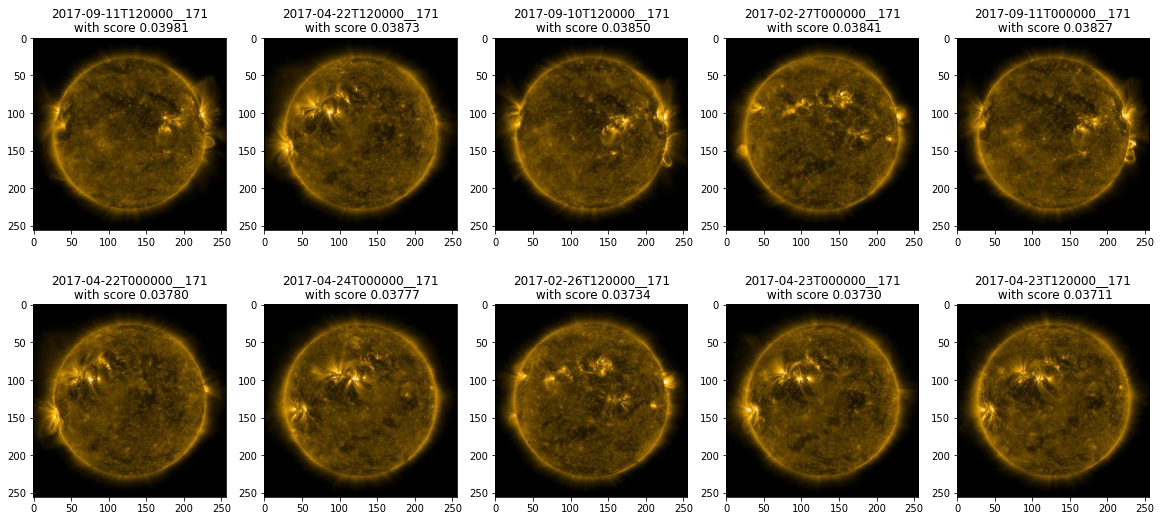

In [7]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

In [8]:
df_asc = df.sort_values(by=['score'], ascending=True)
df_asc.head(10)

,img,score
25,2017-01-13T120000__171.jpeg,0.026303
26,2017-01-14T000000__171.jpeg,0.026476
443,2017-08-12T000000__171.jpeg,0.026485
621,2017-11-09T120000__171.jpeg,0.026527
24,2017-01-13T000000__171.jpeg,0.026611
666,2017-12-07T000000__171.jpeg,0.026622
28,2017-01-15T000000__171.jpeg,0.026754
442,2017-08-11T120000__171.jpeg,0.026803
27,2017-01-14T120000__171.jpeg,0.026806
141,2017-03-13T000000__171.jpeg,0.026849


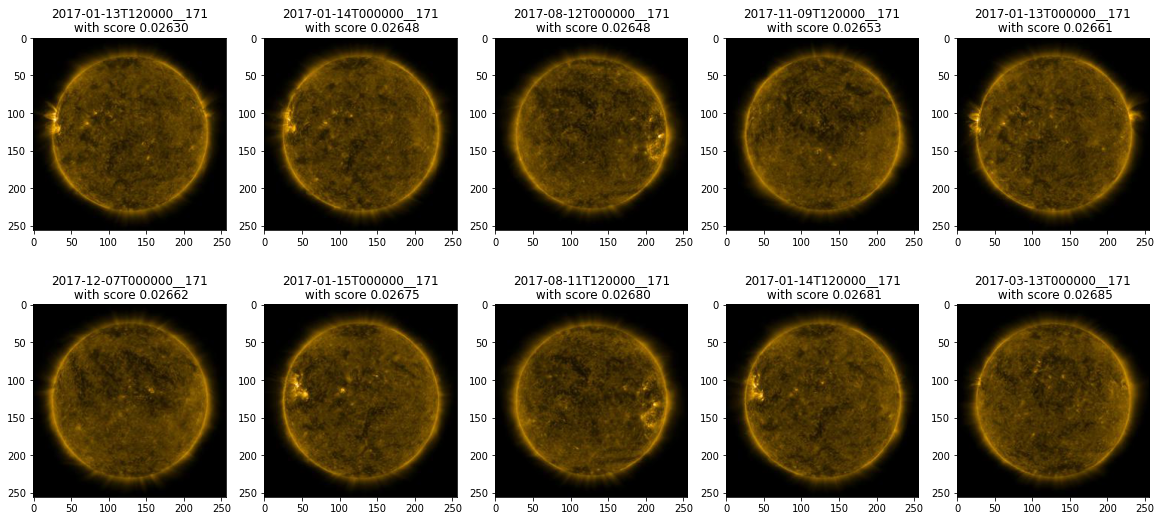

In [9]:
f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df_asc.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.asarray(img)
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
   
    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 
        

In [10]:
import shutil 
import os

dst_path = Path("/Users/mariusgiger/repos/master/data/aia_171_2017_full_disk_256_anomalies/test")
for index, row in df.head(10).iterrows():
    img_path = Path(data_path) / row["img"]
    
    os.makedirs(dst_path, exist_ok=True)
    shutil.copyfile(img_path, dst_path / row["img"])

In [11]:
!python3 ../src/mood/algorithms/ce_vae.py --run="predict" --target-size=256 \
--data-dir="/Users/mariusgiger/repos/master/data/aia_171_2017_full_disk_256" \
--test-dir="/Users/mariusgiger/repos/master/data/aia_171_2017_full_disk_256_anomalies" \
-o "/Users/mariusgiger/repos/master/data/aia_171_2012_full_disk_256_cevae_pred" \
--load-path="/Users/mariusgiger/repos/master/data/aia_171_2012_full_disk_256_cevae_out/20210202-095127_cevae/checkpoint" \
--logger visdom --ce-factor 0.5 --score-mode combi --mode="pixel"

python3: can't open file '../src/mood/algorithms/ce_vae.py': [Errno 2] No such file or directory


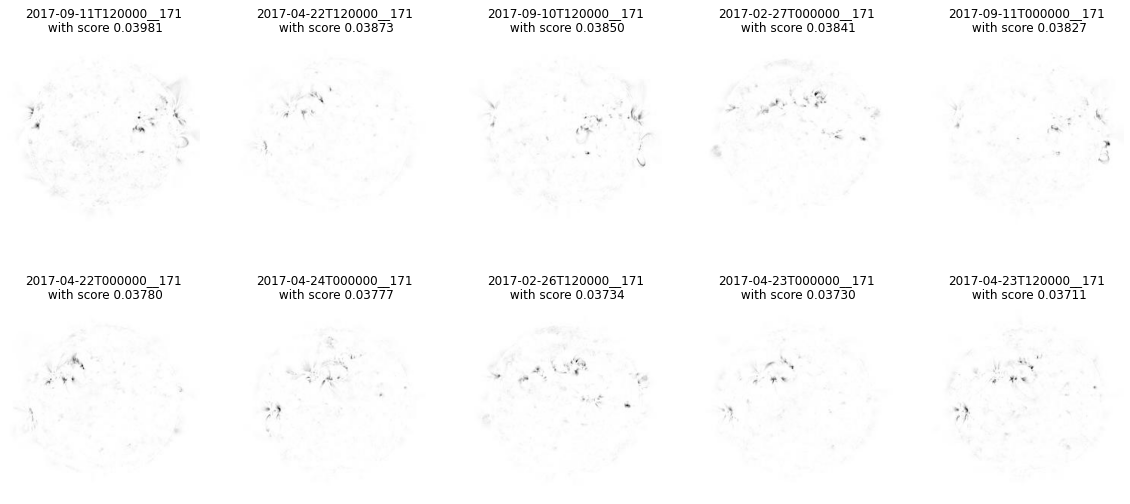

In [12]:
pixel_pred_path = "/Users/mariusgiger/repos/master/sdo-cli/output/aia_171_2017_256_cevae_pred/20210406-115923_cevae/predictions"

f, axarr = plt.subplots(2,5, figsize=(20, 9))

row_index = 0
column_index = 0

for index, row in df.head(10).iterrows():
    img_path = Path(pixel_pred_path) / row["img"]
    img = Image.open(img_path)
    img_arr = np.invert(np.asarray(img))
    axarr[row_index, column_index].set_title(row["img"].replace(".jpeg", "") + "\n with score " + "%.5f" % row["score"])
    axarr[row_index, column_index].imshow(img_arr, cmap='gray', vmin=0, vmax=255)
    axarr[row_index, column_index].spines['top'].set_visible(False)
    axarr[row_index, column_index].spines['right'].set_visible(False)
    axarr[row_index, column_index].spines['bottom'].set_visible(False)
    axarr[row_index, column_index].spines['left'].set_visible(False)
    axarr[row_index, column_index].xaxis.set_ticks([])
    axarr[row_index, column_index].yaxis.set_ticks([])

    if(column_index == 4):
        row_index = (row_index + 1)
        
    column_index = (column_index + 1) % 5 